# Castile and Leon: Crops

### Description:
TODO

### Author:
Sergio García Prado ([garciparedes.me](https://garciparedes.me))

In [1]:
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(RSocrata)
library(ca)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Data Adquisition:

In [2]:
crops.herbaceous <- read.socrata("https://analisis.datosabiertos.jcyl.es/resource/agu2-cspz.csv")

In [3]:
crops.woody <- read.socrata("https://analisis.datosabiertos.jcyl.es/resource/2vwa-si9n.csv")

## Data Exploration:

In [4]:
colnames(crops.herbaceous)

[1] "a_o"                             "codigo_comarca"                 
 [3] "codigo_muncipio"                 "codigo_producto"                
 [5] "codigo_provincia"                "comarca"                        
 [7] "cultivo"                         "grupo_de_cultivo"               
 [9] "municipio"                       "ocupaci_n_primera_regad_o"      
[11] "ocupaci_n_primera_secano"        "ocupaciones_asociadas_regad_o"  
[13] "ocupaciones_asociadas_secano"    "ocupaciones_posteriores_regad_o"
[15] "ocupaciones_posteriores_secano"

#### Remove Empty Columns

In [5]:
crops.herbaceous <- crops.herbaceous %>%
    select(a_o:ocupaci_n_primera_secano)

#### View Data Sample

In [6]:
sample_n(crops.herbaceous, 10)

,a_o,codigo_comarca,codigo_muncipio,codigo_producto,codigo_provincia,comarca,cultivo,grupo_de_cultivo,municipio,ocupaci_n_primera_regad_o,ocupaci_n_primera_secano
46790,2012,3,463,0600/08,9,DEMANDA,ESPARCETA,CULTIVOS FORRAJEROS,VILLASUR DE HERREROS,NA,6
53646,2012,4,317,0400/21,37,PE/ARADA DE BRACAMONTE,COLZA,CULTIV. INDUSTRIALES,TARAZONA DE GUAREÑA,2,84
22704,2011,3,78,0100/01,9,DEMANDA,TRIGO,CEREALES GRANO,CASCAJARES DE LA SIERRA,NA,53
82212,2013,2,169,0200/05,47,CENTRO,GUISANTE SECO,LEGUMINOSAS GRANO,TORRE DE ESGUEVA,1,182
100456,2014,3,150,0600/01,40,SEGOVIA,CEREALES PARA FORRAJ,CULTIVOS FORRAJEROS,OREJANA,0,15
131934,2015,5,149,0600/01,49,SAYAGO,CEREALES PARA FORRAJ,CULTIVOS FORRAJEROS,PEÑAUSENDE,NA,600
87298,2014,1,175,0600/01,5,AREVALO-MADRIGAL,CEREALES PARA FORRAJ,CULTIVOS FORRAJEROS,OSO (EL),0,101
6163,2010,9,160,0006/06,24,ESLA-CAMPOS,ALFALFA,CULTIVOS FORRAJEROS,SANTAS MARTAS,110,159
156983,2016,1,45,0600/10,5,AREVALO-MADRIGAL,VEZA PARA FORRAJE,CULTIVOS FORRAJEROS,CABIZUELA,NA,14
2404,2010,5,94,0001/03,9,ARLANZA,AVENA,CEREALES GRANO,CEBRECOS,NA,9


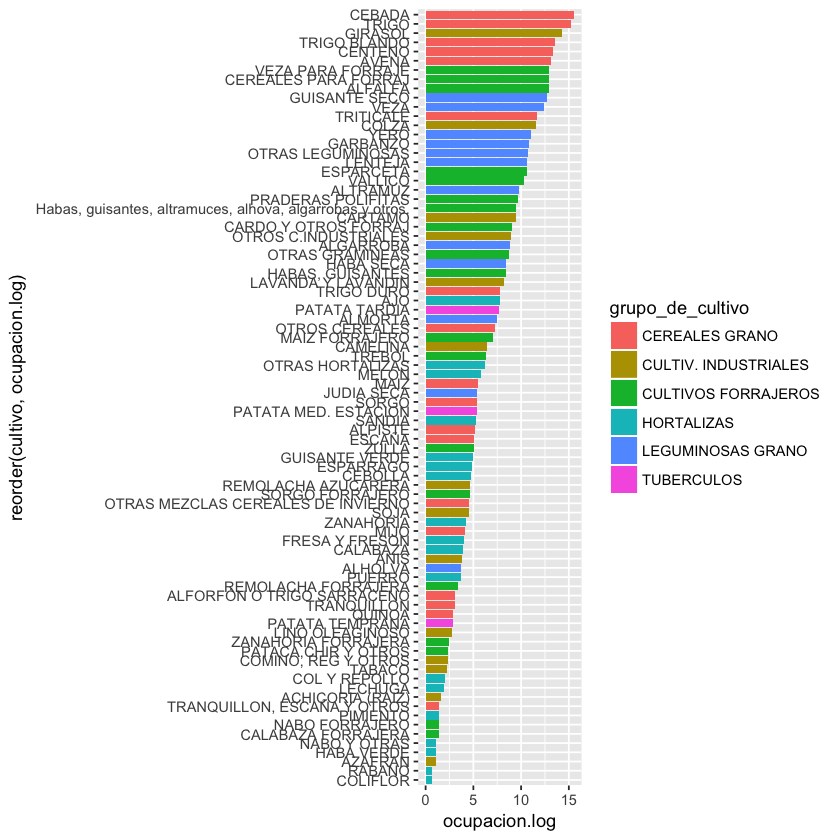

In [7]:
crops.herbaceous %>%
  select(a_o, cultivo, grupo_de_cultivo, ocupaci_n_primera_secano) %>%
  filter(ocupaci_n_primera_secano > 0) %>%
  group_by(grupo_de_cultivo, cultivo) %>%
  summarise(ocupacion = sum(ocupaci_n_primera_secano, na.rm = TRUE)) %>%
  mutate(ocupacion.log = log(ocupacion)) %>%
  filter(ocupacion.log > 0) %>%
  ggplot(aes(x = reorder(cultivo, ocupacion.log), y = ocupacion.log)) + 
    geom_bar(aes(fill = grupo_de_cultivo), stat = "identity") + 
    coord_flip()

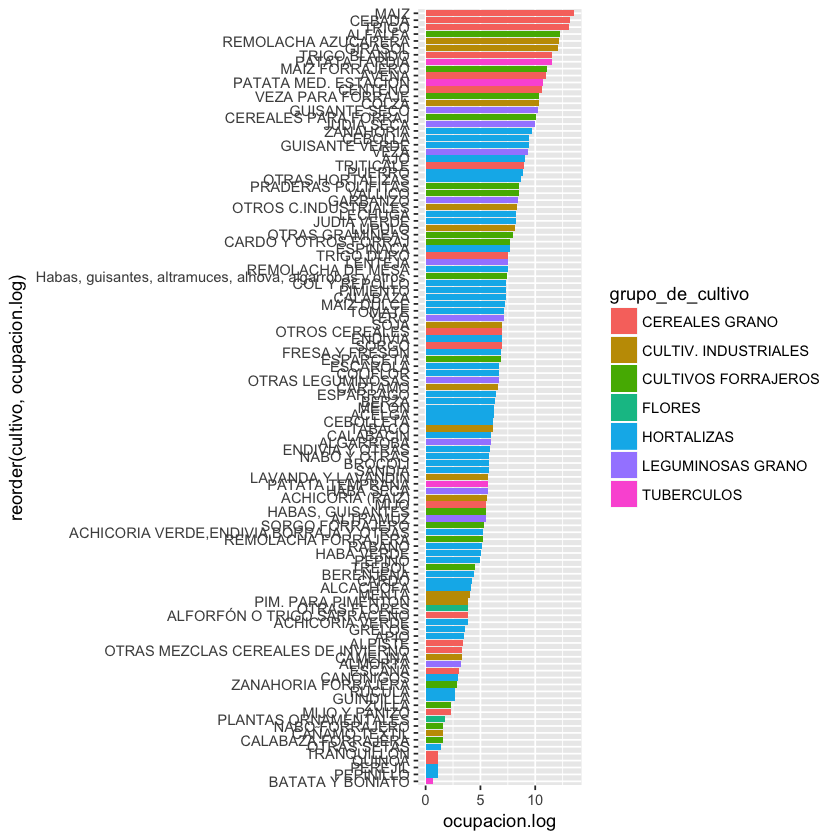

In [8]:
crops.herbaceous %>%
  select(a_o, cultivo, grupo_de_cultivo, ocupaci_n_primera_regad_o) %>%
  filter(ocupaci_n_primera_regad_o > 0) %>%
  group_by(grupo_de_cultivo, cultivo) %>%
  summarise(ocupacion = sum(ocupaci_n_primera_regad_o, na.rm = TRUE)) %>%
  mutate(ocupacion.log = log(ocupacion)) %>%
  filter(ocupacion.log > 0) %>%
  ggplot(aes(x = reorder(cultivo, ocupacion.log), y = ocupacion.log)) + 
    geom_bar(aes(fill = grupo_de_cultivo), stat = "identity") + 
    coord_flip()

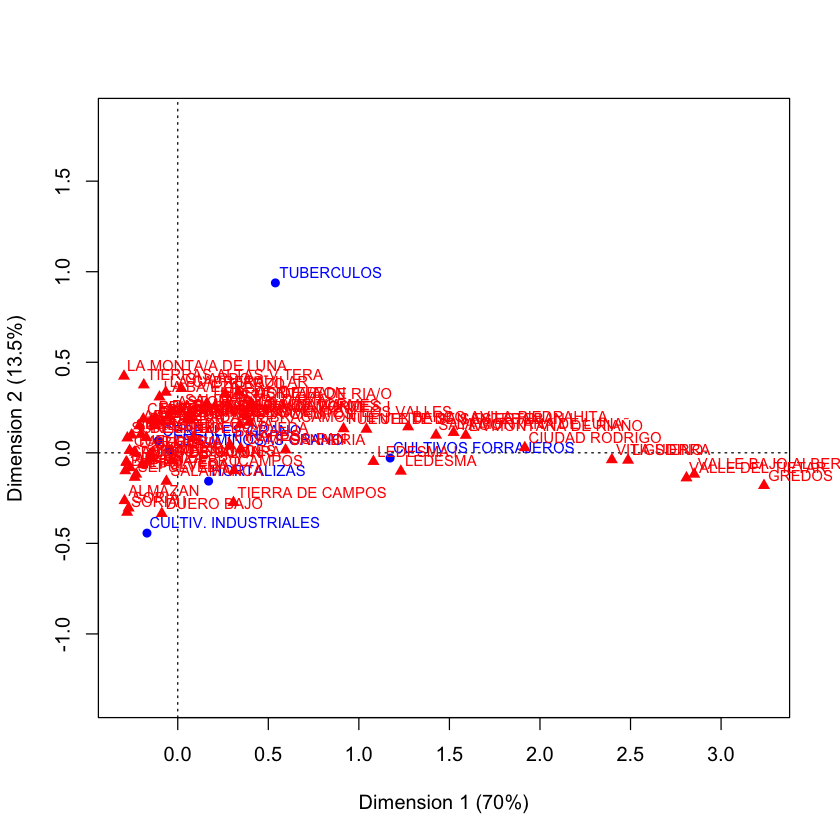

In [9]:
crops.herbaceous %>%
    select(grupo_de_cultivo, comarca, ocupaci_n_primera_secano) %>%
    filter(ocupaci_n_primera_secano > 0) %>%
    xtabs(formula = ocupaci_n_primera_secano ~ .) %>%
    ca() %>% 
    plot()